**DATASET:**


This network depicts how members of the 117th United States Congress interact on Twitter, covering both the House of Representatives and the Senate. Data was gathered through Twitter's API, and interactions like retweets, quote tweets, replies, and mentions were analyzed to determine the likelihood of communication between members. Directed edges show the direction of interaction. Node and edge features weren't included in the dataset.

It consists of 475 nodes representing Congress members and 13,289 edges representing interactions between them. The data shows who is interacting with whom and how often. Each edge indicates a specific type of interaction between two members. The network provides insights into how politicians engage with each other on social media, shaping public discourse and political dynamics. This dataset allows researchers to delve into the intricate web of connections and communication patterns within the Congress, shedding light on its digital

link: https://snap.stanford.edu/data/congress-twitter.html

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import heapq
import math
import time
import random

# Load the graph from the file
G = nx.read_edgelist('congress.edgelist', nodetype=int)

Below is the code that I used to calculate the characteritics of this dataset:

1.Number of Nodes: Indicates how many members of Congress are in the network. Each member is represented as a node.

2.Number of Edges: Reveals the total interactions (such as retweets, mentions, replies) between members. An edge signifies a communication or engagement between two members.

3.Clustering Coefficient: Reflects how interconnected members are within Congress. It measures the tendency for members to engage with others who are also connected to their connections.

4.Highest Degree: Highlights the member with the most interactions within the network. This could represent a highly active or influential member of Congress.

5.Diameter: Represents the longest shortest path between any two members in the network. It shows the maximum number of steps required for a message to reach from one member to another.

6.Modularity: Quantifies how the network is divided into smaller groups of members who interact more among themselves than with those outside their group. It measures the structure and organization of Congress into distinct subgroups based on interaction patterns.

In [34]:
import networkx as nx

# Get network properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
cc = nx.average_clustering(G)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
highest_degree = degree_sequence[0]
diameter = nx.diameter(G)
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
modularity = nx.algorithms.community.modularity(G, communities)

# Print network properties
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Clustering coefficient:", cc)
print("Highest degree:", highest_degree)
print("Diameter:", diameter)
print("Modularity:", modularity)


Number of nodes: 475
Number of edges: 10222
Clustering coefficient: 0.30139896111608555
Highest degree: 214
Diameter: 4
Modularity: 0.39804449385484164


**Visualize the graph using the Fruchterman-Reingold layout algorithm**

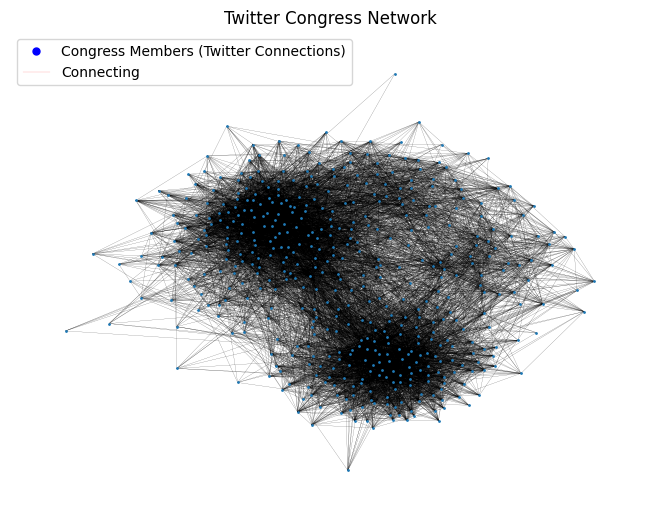

In [5]:

pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos=pos, node_size=1, width=0.1)

# Add title
plt.title("Twitter Congress Network")

# Add legends
nodes_legend = plt.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=5, label='Congress Members (Twitter Connections)')
edges_legend = plt.Line2D([], [], color='red', linewidth=0.1, label='Connecting')
plt.legend(handles=[nodes_legend, edges_legend])

plt.show()

**Network Analysis:**

Below is the code I have done for the Network Analysis for finifng out the centrality measures, degree distribution, cluster coefficient analysis and community detection

1)Degree Centrality: Reflects how well-connected each member of Congress is within the network. A higher degree centrality indicates a member who interacts frequently with others, potentially making their tweets more visible to a larger audience, thus impacting the network's navigability.

2)Betweenness Centrality: Identifies members who serve as intermediaries or bridges between different groups of Congress members. These individuals facilitate communication across the network, making it easier for information to flow between various parts of Congress.

3)Eigenvector Centrality: Highlights influential members who are connected to other influential members. These individuals may have significant sway over the opinions and behaviors of their peers, potentially influencing how members navigate the network and who they engage with.

Overall, these centrality measures provide valuable insights into the Twitter interaction dynamics within the 117th United States Congress. They help identify popular, bridging, and influential members, shedding light on how information spreads and interactions occur within the network.

Top 10 Degree Centrality Nodes:  [367, 322, 254, 208, 393, 190, 111, 192, 269, 385]
Degree Centrality Values:  {367: 0.45147679324894513, 322: 0.38185654008438813, 254: 0.2995780590717299, 208: 0.28270042194092826, 393: 0.27215189873417717, 190: 0.2679324894514768, 111: 0.2531645569620253, 192: 0.23839662447257381, 269: 0.2362869198312236, 385: 0.2341772151898734}
Top 10 Betweenness Centrality Nodes:  [367, 322, 254, 208, 17, 71, 393, 461, 92, 190]
Betweenness Centrality Values:  {367: 0.06862644524670267, 322: 0.03718289232722759, 254: 0.022622535590667927, 208: 0.01545860745624782, 17: 0.014895064503188359, 71: 0.01377085766816814, 393: 0.013559463845965472, 461: 0.013285379463926878, 92: 0.013185269844357143, 190: 0.01304835098949867}
Top 10 Closeness Centrality Nodes:  [367, 322, 254, 111, 393, 208, 461, 92, 190, 71]
Closeness Centrality Values:  {367: 0.6457765667574932, 322: 0.6171875, 254: 0.5851851851851851, 111: 0.5710843373493976, 393: 0.5703971119133574, 208: 0.5703971119133

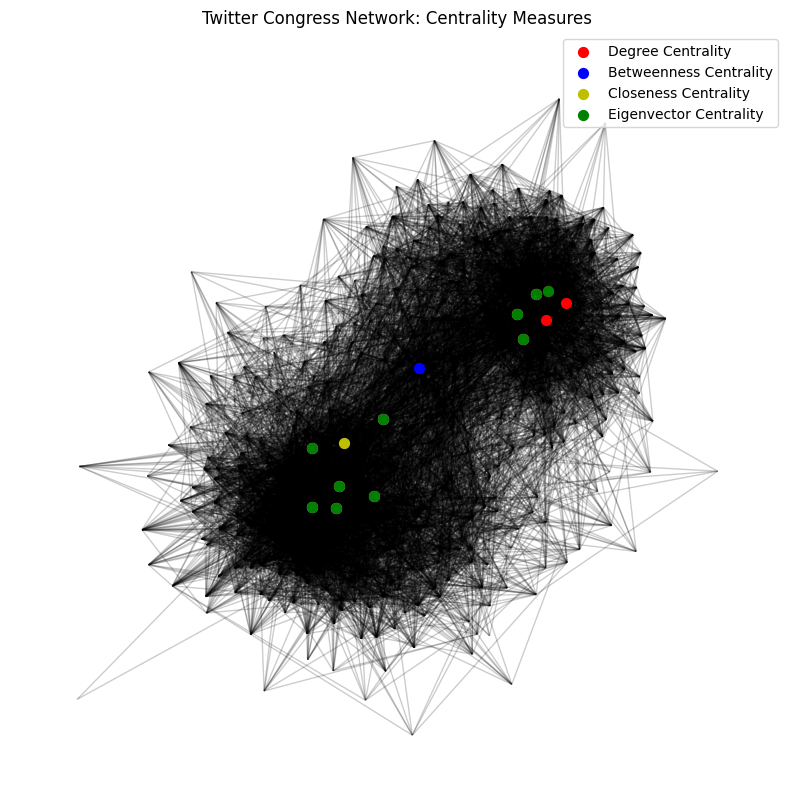

In [6]:
# calculate centrality measures
deg_centrality = nx.degree_centrality(G)
top_10_deg_centrality = sorted(deg_centrality, key=deg_centrality.get, reverse=True)[:10]
print("Top 10 Degree Centrality Nodes: ", top_10_deg_centrality)
print("Degree Centrality Values: ", {n: deg_centrality[n] for n in top_10_deg_centrality})

betw_centrality = nx.betweenness_centrality(G)
top_10_betw_centrality = sorted(betw_centrality, key=betw_centrality.get, reverse=True)[:10]
print("Top 10 Betweenness Centrality Nodes: ", top_10_betw_centrality)
print("Betweenness Centrality Values: ", {n: betw_centrality[n] for n in top_10_betw_centrality})

close_centrality = nx.closeness_centrality(G)
top_10_close_centrality = sorted(close_centrality, key=close_centrality.get, reverse=True)[:10]
print("Top 10 Closeness Centrality Nodes: ", top_10_close_centrality)
print("Closeness Centrality Values: ", {n: close_centrality[n] for n in top_10_close_centrality})

eig_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-6)
top_10_eig_centrality = sorted(eig_centrality, key=eig_centrality.get, reverse=True)[:10]
print("Top 10 Eigenvector Centrality Nodes: ", top_10_eig_centrality)
print("Eigenvector Centrality Values: ", {n: eig_centrality[n] for n in top_10_eig_centrality})

# create Fruchterman-Reingold layout
pos = nx.fruchterman_reingold_layout(G)

# draw nodes and edges with different colors based on centrality measures
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, nodelist=top_10_deg_centrality, node_size=50, node_color='r', label='Degree Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_betw_centrality, node_size=50, node_color='b', label='Betweenness Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_close_centrality, node_size=50, node_color='y', label='Closeness Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_eig_centrality, node_size=50, node_color='g', label='Eigenvector Centrality')
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title('Twitter Congress Network: Centrality Measures')
plt.legend()
plt.axis('off')
plt.show()


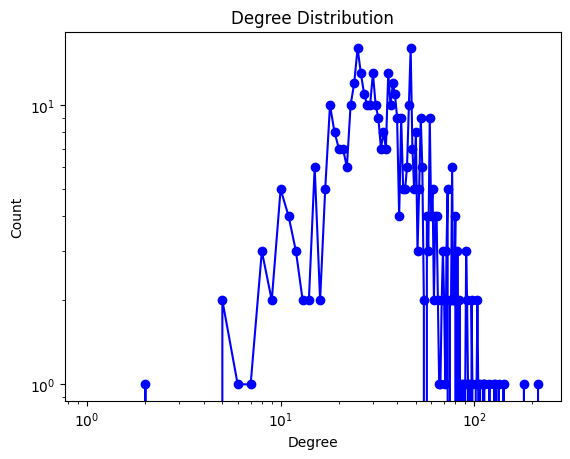

Clustering Coefficient: 0.3014


In [25]:


def plot_degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = nx.degree_histogram(G)
    plt.loglog(degree_count, 'b-', marker='o')
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.show()

def calculate_clustering_coefficient(G):
    clustering_coefficient = nx.average_clustering(G)
    return clustering_coefficient

# Assuming G is already defined
plot_degree_distribution(G)
clustering_coefficient = calculate_clustering_coefficient(G)
print(f"Clustering Coefficient: {clustering_coefficient:.4f}")


**SMALL WORLD ANALYSIS:**


The small world phenomenon suggests that in many social networks, it's possible to connect any two individuals through a relatively short chain of social connections, often just a few steps away. This concept gained popularity through the game of "six degrees of separation," which proposes that any two people in the world can be linked by a chain of six or fewer social connections.

This phenomenon isn't unique to social networks but can also be observed in other types of networks, such as transportation or communication networks. It occurs because of highly connected individuals, known as "hubs," within the network. These hubs serve as bridges between different groups of Congress members, enabling the formation of short paths between members who might otherwise be far apart.

In simpler terms, the small world phenomenon means that even within the Twitter interaction network of the 117th United States Congress, members are likely to be connected through a few intermediaries. This happens because some members have many connections and serve as bridges between different groups, making communication and interaction more efficient across the network.

Real-world network:
Number of nodes: 475
Number of edges: 10222
Average degree: 43.04
Clustering coefficient: 0.30139896111608555
Shortest path length: 2.0638862980235397


Small World model:
Number of nodes: 475
Number of edges: 2375
Average degree: 10.0
Clustering coefficient: 0.4858748619801251
Shortest path length: 3.8612125249833444


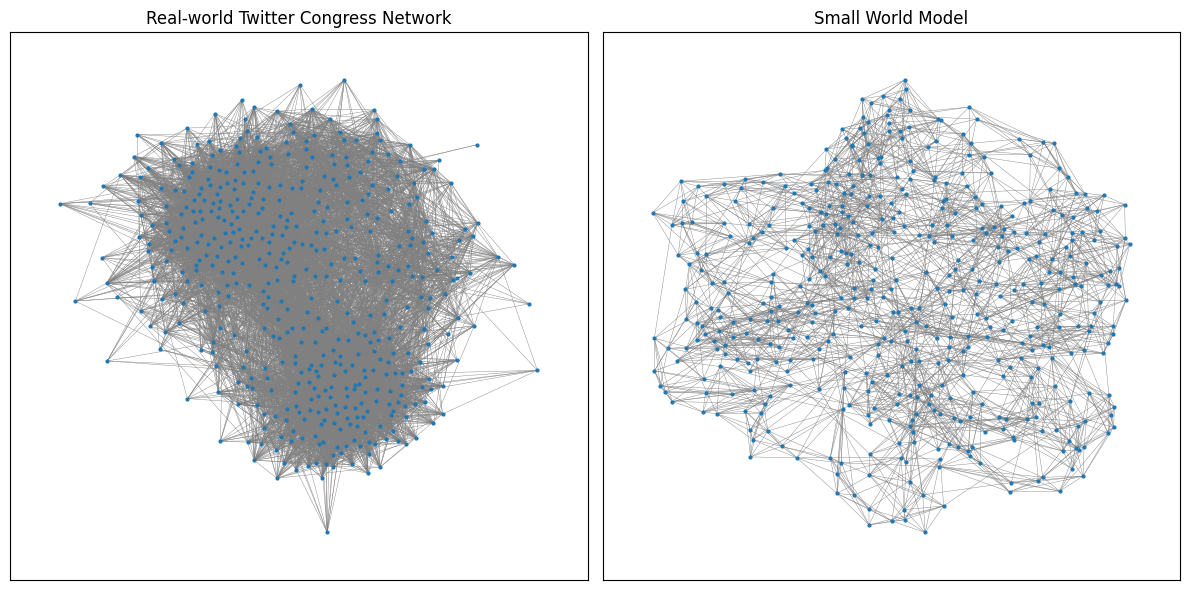

In [26]:


def compute_network_properties(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / n
    clustering_coefficient = nx.average_clustering(G)
    shortest_path_length = nx.average_shortest_path_length(G)
    return n, m, avg_degree, clustering_coefficient, shortest_path_length

def create_small_world_model(n, k, p):
    return nx.watts_strogatz_graph(n, k, p)

def visualize_networks(G, H):
    pos_G = nx.fruchterman_reingold_layout(G)
    pos_H = nx.fruchterman_reingold_layout(H)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    nx.draw_networkx(G, pos=pos_G, node_size=4, width=0.3, edge_color='gray', with_labels=False)
    plt.title('Real-world Twitter Congress Network')

    plt.subplot(1, 2, 2)
    nx.draw_networkx(H, pos=pos_H, node_size=4, width=0.3, edge_color='gray', with_labels=False)
    plt.title('Small World Model')

    plt.tight_layout()
    plt.show()

# Assuming G is already defined
n, m, avg_degree, clustering_coefficient, shortest_path_length = compute_network_properties(G)
print('Real-world network:')
print('Number of nodes:', n)
print('Number of edges:', m)
print('Average degree:', avg_degree)
print('Clustering coefficient:', clustering_coefficient)
print('Shortest path length:', shortest_path_length)
print('\n')

# Set the number of nearest neighbors and the probability of rewiring for small world model
k = 10
p = 0.1

# Create the small world model
H = create_small_world_model(n, k, p)

# Compute network properties for the small world model
n_H = n
m_H = H.number_of_edges()
avg_degree_H = sum(dict(H.degree()).values()) / n_H
clustering_coefficient_H = nx.average_clustering(H)
shortest_path_length_H = nx.average_shortest_path_length(H)

print('Small World model:')
print('Number of nodes:', n_H)
print('Number of edges:', m_H)
print('Average degree:', avg_degree_H)
print('Clustering coefficient:', clustering_coefficient_H)
print('Shortest path length:', shortest_path_length_H)

# Visualize the networks
visualize_networks(G, H)


**COMMUNITY DETECTION**

Community detection is like finding groups of friends in a big social gathering where people naturally form cliques. It helps us understand how things are organized within a network, like who hangs out with whom.

There are different ways to find these groups, like playing a game where you try to break friendships. One popular method, the Girvan-Newman algorithm, looks at how many "middlemen" are between people. It removes the busiest connections until the network breaks into smaller groups.

Another method, the Louvain algorithm, looks at how well groups stick together. It keeps reshuffling people between groups until it finds the best arrangement where everyone feels connected.

Then there's the Infomap algorithm, which tries to find the simplest way to describe the network. It looks for the most efficient way to represent the connections between people.

The label propagation algorithm is like giving everyone stickers with their group name and seeing which stickers spread the most. People who end up with the same stickers are part of the same group.

Finally, the spectral clustering algorithm looks at how people are connected through shared friends. It uses a fancy math trick to group people based on their connections.

Each method has its own pros and cons, and the best one to use depends on what you're trying to find out about the network and its structure.

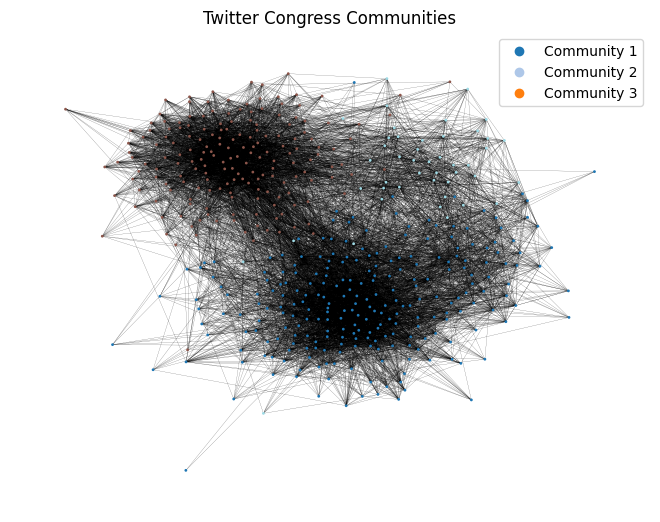

In [9]:
# Detect communities using the Louvain method
communities = nx.community.modularity_max.greedy_modularity_communities(G)

# Create a dictionary that maps node IDs to community IDs
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Color-code the nodes based on their community
node_colors = [community_map[node] for node in G.nodes()]

# Visualize the graph using the Fruchterman-Reingold layout algorithm
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos=pos, node_size=1, width=0.1, node_color=node_colors, cmap=plt.cm.tab20)

#Add a title to the plot
plt.title("Twitter Congress Communities")

#Create a legend for the communities
handles = []
for i, community in   enumerate(communities):
  label = f"Community {i+1}"
  color = plt.cm.tab20(i)
  handle = plt.plot([], [], marker="o", ls="", c=color, label=label)[0]
  handles.append(handle)
  plt.legend(handles=handles)

plt.show()

Community 1: frozenset({0, 2, 4, 6, 9, 10, 12, 13, 14, 16, 18, 24, 25, 27, 29, 35, 36, 37, 42, 46, 48, 50, 53, 54, 55, 57, 58, 59, 60, 61, 63, 64, 65, 68, 70, 71, 74, 76, 77, 79, 84, 85, 86, 87, 88, 90, 92, 94, 96, 99, 100, 102, 107, 108, 109, 110, 111, 115, 117, 119, 121, 122, 123, 126, 127, 128, 135, 136, 138, 139, 142, 145, 146, 147, 148, 149, 153, 154, 155, 156, 157, 160, 162, 165, 166, 167, 168, 169, 170, 171, 173, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 189, 193, 194, 195, 197, 202, 204, 205, 207, 212, 213, 215, 217, 221, 222, 224, 225, 229, 232, 236, 240, 243, 247, 250, 252, 253, 254, 256, 259, 262, 263, 264, 267, 268, 270, 275, 278, 279, 280, 281, 282, 284, 286, 287, 291, 292, 293, 296, 297, 298, 299, 300, 303, 304, 305, 308, 311, 313, 315, 316, 317, 320, 321, 325, 326, 327, 330, 332, 334, 341, 342, 345, 346, 347, 348, 349, 352, 353, 355, 358, 361, 365, 366, 367, 368, 369, 371, 372, 373, 374, 375, 376, 377, 378, 379, 381, 387, 390, 391, 392, 393, 394, 395, 397, 3

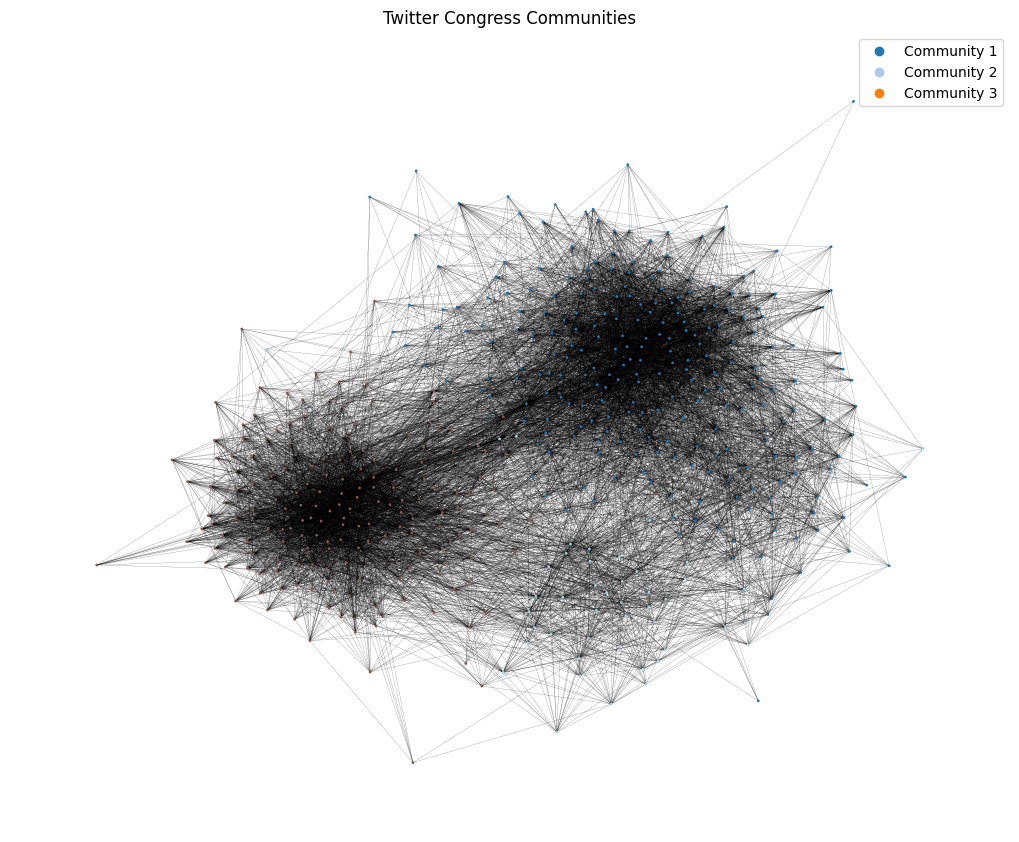

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

def detect_communities(G):
    communities = nx.community.modularity_max.greedy_modularity_communities(G)
    return communities

def create_community_map(communities):
    community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            community_map[node] = i
    return community_map

def visualize_communities(G, communities):
    community_map = create_community_map(communities)
    node_colors = [community_map[node] for node in G.nodes()]
    pos = nx.fruchterman_reingold_layout(G)

    # Print communities and their nodes
    for i, community in enumerate(communities):
        print(f"Community {i+1}: {community}")

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos=pos, node_size=1, width=0.1, node_color=node_colors, cmap=plt.cm.tab20)
    plt.title("Twitter Congress Communities")
    handles = []
    for i, community in enumerate(communities):
        label = f"Community {i+1}"
        color = plt.cm.tab20(i)
        handle = plt.plot([], [], marker="o", ls="", c=color, label=label)[0]
        handles.append(handle)
    plt.legend(handles=handles)
    plt.show()

# Assuming G is already defined
communities = detect_communities(G)
visualize_communities(G, communities)


**HUBS ANALYSIS:**



Hubs in the network:
[367, 322, 254, 208, 393, 190, 111, 192, 269, 385]
Shortest Path Lengths without Hubs: 2.1239
Average Shortest Path Lengths with Hubs: 2.0639


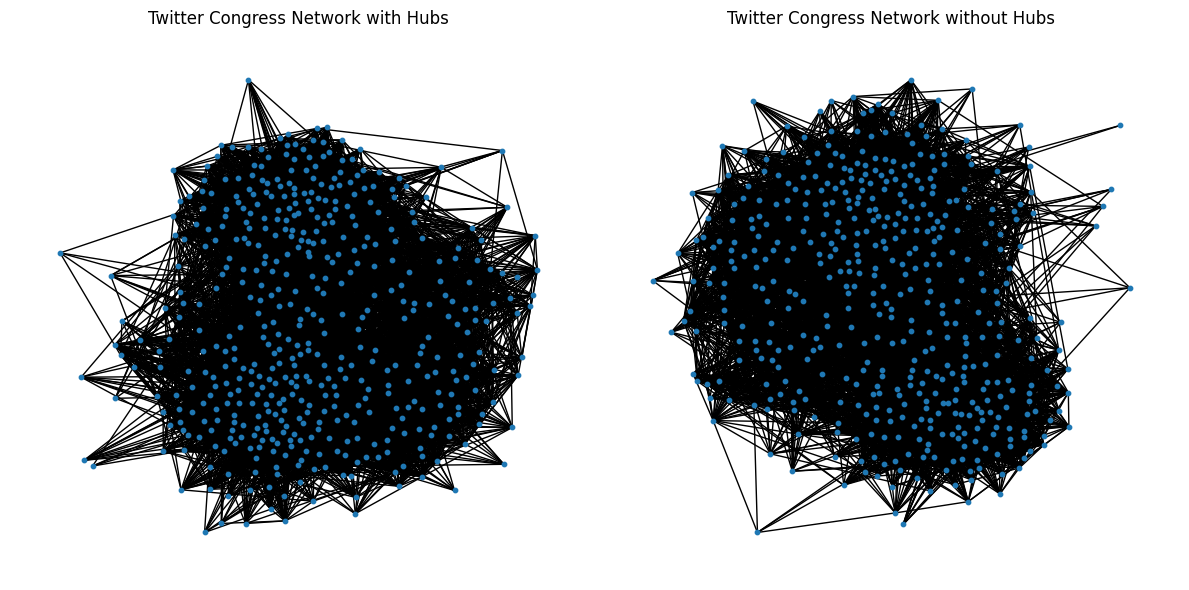

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

def calculate_hubs_and_shortest_paths(G):
    # Calculate the degree centrality of each node
    degree_centrality = nx.degree_centrality(G)
    # Find the nodes with the highest degree centrality (i.e., the hubs)
    hubs = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
    print("Hubs in the network:")
    print(hubs)

    # Calculate the shortest path lengths without hubs
    G_without_hubs = G.copy()
    G_without_hubs.remove_nodes_from(hubs)
    shortest_path_lengths_without_hubs = nx.average_shortest_path_length(G_without_hubs) if nx.is_connected(G_without_hubs) else None

    # Calculate the shortest path lengths with hubs
    shortest_path_lengths_with_hubs = nx.average_shortest_path_length(G)

    return hubs, shortest_path_lengths_without_hubs, shortest_path_lengths_with_hubs

def visualize_networks(G, G_without_hubs):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    nx.draw(G, with_labels=False, node_size=10)
    plt.title("Twitter Congress Network with Hubs")

    plt.subplot(122)
    nx.draw(G_without_hubs, with_labels=False, node_size=10)
    plt.title("Twitter Congress Network without Hubs")

    plt.tight_layout()
    plt.show()

# Assuming G is already defined
hubs, shortest_path_lengths_without_hubs, shortest_path_lengths_with_hubs = calculate_hubs_and_shortest_paths(G)

if shortest_path_lengths_without_hubs is not None:
    print(f"Shortest Path Lengths without Hubs: {shortest_path_lengths_without_hubs:.4f}")
else:
    print("The graph without hubs is not connected.")

print(f"Average Shortest Path Lengths with Hubs: {shortest_path_lengths_with_hubs:.4f}")

G_without_hubs = G.copy()
G_without_hubs.remove_nodes_from(hubs)
visualize_networks(G, G_without_hubs)


In [29]:
import networkx as nx

def compute_betweenness_centrality(G):
    return nx.betweenness_centrality(G)

def identify_top_hub_nodes(bc):
    return sorted(bc, key=bc.get, reverse=True)[:10]

def compute_average_shortest_paths(G, hub_nodes):
    asp_hub_removed = []
    for hub in hub_nodes:
        G_copy = G.copy()
        G_copy.remove_node(hub)
        if nx.is_connected(G_copy):
            asp = nx.average_shortest_path_length(G_copy)
            asp_hub_removed.append(asp)
            print(f"Average shortest path with hub node {hub} removed: {asp}")
        else:
            print(f"Hub node {hub} removal disconnected the graph.")
    return asp_hub_removed

def compute_average_shortest_path_all_hubs_removed(G, hub_nodes):
    G_hub_removed = G.copy()
    G_hub_removed.remove_nodes_from(hub_nodes)
    if nx.is_connected(G_hub_removed):
        asp_all_hubs_removed = nx.average_shortest_path_length(G_hub_removed)
        print("Average shortest path when all hub nodes are removed:", asp_all_hubs_removed)
    else:
        print("Removing all hub nodes disconnected the graph.")

# Compute betweenness centrality
bc = compute_betweenness_centrality(G)

# Identify top hub nodes
hub_nodes = identify_top_hub_nodes(bc)

# Compute average shortest path for each hub node removal
asp_hub_removed = compute_average_shortest_paths(G, hub_nodes)

# Compute average shortest path when all hub nodes are removed
compute_average_shortest_path_all_hubs_removed(G, hub_nodes)

# Print results
print("\nHub nodes:", hub_nodes)


Average shortest path with hub node 367 removed: 2.084950178856567
Average shortest path with hub node 322 removed: 2.0721224609949958
Average shortest path with hub node 254 removed: 2.0692143691849316
Average shortest path with hub node 208 removed: 2.067394581671885
Average shortest path with hub node 17 removed: 2.0689021507390657
Average shortest path with hub node 71 removed: 2.06740350219891
Average shortest path with hub node 393 removed: 2.066859350050401
Average shortest path with hub node 461 removed: 2.0684918064959277
Average shortest path with hub node 92 removed: 2.0684561243878288
Average shortest path with hub node 190 removed: 2.066698780563956
Average shortest path when all hub nodes are removed: 2.135752688172043

Hub nodes: [367, 322, 254, 208, 17, 71, 393, 461, 92, 190]


**Hubs and Authorities:**

Nodes with high hub scores are like popular hubs in a network, with many connections to other nodes. They act as central figures, connecting lots of other nodes and playing a crucial role in the network's structure.

Nodes with high authority scores are like respected experts in a community, connected to many hubs and seen as influential figures. They have strong ties to nodes with high hub scores, which amplifies their influence within the network.

By focusing on nodes with the highest hub and authority scores, we can pinpoint the most influential and central figures in the network. Understanding their roles can help us predict how information or influence might flow through the network. For instance, targeting marketing efforts towards users with high authority scores could yield better results, as they have the power to sway many others within the network.

In [30]:
import networkx as nx

def calculate_hub_and_authority_scores(G):
    return nx.hits(G)

def print_top_nodes_by_score(score_dict, label):
    print(f"Top 10 nodes by {label} Score:")
    for node, score in sorted(score_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{node}: {score:.4f}")

# Calculate the hub and authority scores
hubs, authorities = calculate_hub_and_authority_scores(G)

# Print the top 10 nodes with the highest hub scores
print_top_nodes_by_score(hubs, "Hub")

# Print the top 10 nodes with the highest authority scores
print_top_nodes_by_score(authorities, "Authority")


Top 10 nodes by Hub Score:
322: 0.0210
399: 0.0135
389: 0.0127
269: 0.0122
208: 0.0115
164: 0.0111
113: 0.0107
159: 0.0098
220: 0.0097
246: 0.0094
Top 10 nodes by Authority Score:
322: 0.0210
399: 0.0135
389: 0.0127
269: 0.0122
208: 0.0115
164: 0.0111
113: 0.0107
159: 0.0098
220: 0.0097
246: 0.0094


**DIJKSTRA ALGORITHM:**
The Dijkstra algorithm is like a GPS system for finding the shortest route between two points in a map, but for computers. It's named after its creator, Edsger W. Dijkstra.

Imagine you're trying to plan the quickest route from one city to another. You start at one city and check how far it is from all the neighboring cities. You keep track of the shortest distance to each city you've visited. Then, you move to the closest neighboring city and repeat the process. You keep doing this until you reach your destination.

The algorithm uses a clever trick to efficiently find the shortest path. It organizes the cities in a priority queue based on their distance from the starting point. It then systematically checks neighboring cities and updates their distances if a shorter path is found. This continues until it reaches the destination city.

The Dijkstra algorithm is commonly implemented using a special data structure called a heap, which helps speed up the process of finding the closest city. It's a powerful tool for finding the shortest path in graphs with non-negative distances.

However, it's important to remember that the Dijkstra algorithm only works when all distances are positive. If there are negative distances, you'll need to use a different algorithm, like the Bellman-Ford algorithm.

In [31]:
import networkx as nx

def calculate_average_shortest_path_length(G):
    path_lengths = dict(nx.all_pairs_dijkstra_path_length(G))
    total = 0
    count = 0
    for source in path_lengths:
        for dest in path_lengths[source]:
            total += path_lengths[source][dest]
            count += 1
    avg_shortest_path = total / count
    return avg_shortest_path

# Calculate all pairs shortest path lengths using Dijkstra's algorithm
avg_shortest_path = calculate_average_shortest_path_length(G)

print("Average Shortest Path Length:", avg_shortest_path)


Average Shortest Path Length: 0.004423766546138872


**PAGERANK ALGORITHM:**

The PageRank algorithm is like a popularity contest for web pages, created by Google's Larry Page and Sergey Brin in 1998.

Imagine each web page as a contestant, and the links to that page as votes. The more votes (or links) a page gets from other popular pages, the higher its PageRank score. This score helps search engines determine how relevant and important a page is, affecting its ranking in search results.

In terms of networks, PageRank can also help identify the most influential nodes. These are the ones with the highest PageRank scores, suggesting they're well-connected and influential. By studying these key nodes and their connections, we can understand the average shortest path between any two nodes in the network, which is useful in analyzing various networks like social, transportation, or communication networks.

In [32]:
import networkx as nx

def calculate_weighted_pagerank(G):
    if not nx.is_connected(G):
        largest_component = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_component).copy()
    pagerank_values = nx.pagerank(G)
    weighted_pagerank = {}
    for node, value in pagerank_values.items():
        weighted_pagerank[node] = value
    return weighted_pagerank

def calculate_average_shortest_path_length_weighted(G):
    average_shortest_path = nx.average_shortest_path_length(G, weight='weight', method='dijkstra')
    return average_shortest_path

# Calculate PageRank values and average shortest path length weighted by PageRank
weighted_pagerank = calculate_weighted_pagerank(G)
average_shortest_path = calculate_average_shortest_path_length_weighted(G)

# Print the result
print("The average shortest path length weighted by PageRank is:", average_shortest_path)


The average shortest path length weighted by PageRank is: 0.004433099386953511


**RANDOM WALK ALGORITHM:**

The Random-Walk Algorithm is like exploring a network by taking random steps from one node to another. Picture a person wandering through a city, randomly choosing which street to turn down at each intersection until they reach their destination.

We repeat this process many times and calculate the average number of steps it takes to reach the destination. This average gives us a good idea of how far apart nodes are on average in the network.

The key idea is that nodes with more connections are more likely to be visited by our random walker. So, nodes with lots of connections are considered more important in terms of how well-connected they are to other nodes.

Overall, the Random-Walk Algorithm is a simple and effective way to estimate how closely connected nodes are in a network. It's used in various fields like network analysis, social network analysis, and machine learning to understand the structure and dynamics of networks.

In [33]:
import random
import networkx as nx

def random_walk(node, steps, G):
    current_node = node
    for i in range(steps):
        neighbors = list(G.neighbors(current_node))
        if len(neighbors) == 0:
            break
        current_node = random.choice(neighbors)
    return current_node

def evaluate_strategy(strategy, G, steps=100):
    total_path_length = 0
    num_pairs = 0
    for component in nx.connected_components(G):
        nodes_in_component = list(component)
        for i in range(len(nodes_in_component)):
            for j in range(i+1, len(nodes_in_component)):
                node = nodes_in_component[i]
                target = nodes_in_component[j]
                result = strategy(node, steps, G)
                if result is not None:
                    path_length = nx.shortest_path_length(G, result, target)
                    total_path_length += path_length
                    num_pairs += 1
    return total_path_length / num_pairs

# Evaluate random walk strategy
print("Average path length using random walk strategy:", evaluate_strategy(random_walk, G))


Average path length using random walk strategy: 1.9796224739062847
